BIENVENU SUR LE TUTORIEL 1 SUR L'ANALYSE CONVEXE AVEC color

EN DEBUTTANT SUR MATLAB POUR RESOUDRE DES PROBLEMES D'OPTIMISATON CONVEXE :

--il faut connaitre ce qu'es une fonction convexe

--Lorsqu'une fonction est dérivable et quel difference avec une fonction non dérivable

--quels sont les fonctions objectifs qui existe et comment faire le choix de la fonction objectif et aussi voir si on creer une fonction par rapport au problème qu'on rencontre

<div style="font-weight: bold; text-transform: uppercase; text-align: center; color: red; font-size: 25px;">
  commençons
</div>


Le Forward-Backward est un algorithme classique pour résoudre des problèmes d’optimisation de la forme

![Capture d’écran du 2025-10-22 19-08-13.png](<attachment:Capture d’écran du 2025-10-22 19-08-13.png>)
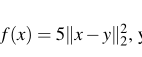

prenons la focntion si dessus : onservation cette focntion est differentiable et donc on applique l'algorithme de Forward-Backward

Alors, f.eval est utiliser pour definir la fonction objectif a evaluer
f.grad : utiliser pour calculer le gradient vu que la focntion est derivable
f.beta : pour calculer le gradient de Lipschitz

In [ ]:
tau = 5;
f.eval = @(x) tau * norm(x);
f.grad = @(x) 2 * tau * (x - y);
f.beta = 2 * tau;

<div>approchons la fonction par un operateur proximal de norme l2</div>

</ul>


In [ ]:
tau = 5;
f.eval = @(x) tau * norm(x);
paramf.y = y;
f.prox = @(x,T) prox_l2( x, tau*T , paramf );

l'ajout de parametre optionnel est paramf

passons le tout a notre solveur solvep 

In [ ]:
sol = solvep(x_0, {f1, f2, f3});

prenons l'exemple qui nous permettra de selectionner un solveur

In [ ]:

s.name = 'DEMO_FORWARD_BACKWARD';
s.initialize = @(x_0, fg, Fp, param) ...
forward_backward_initialize(x_0,fg,Fp,param);
s.algorithm = @(x_0, fg, Fp, sol, s, param) ...
forward_backward_algorithm(fg, Fp, sol, s, param);
s.finalize = @(x_0, fg, Fp, sol, s, param) sol;

<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="text-transform: uppercase; font-size: 18px; text-align: center;">
    Exemple d'utilisation du solveur Forward-Backward
  </h3>

  <ol style="margin-left: 20px;  font-size: 15px;">
    <li>
      <strong>Appel du solveur :</strong> On crée une variable <code>s</code> pour contenir le solveur.
    </li>
    <li>
      <strong>Initialisation :</strong> On initialise la fonction avec <code>s.initialize</code>, qui prépare les variables internes et la solution initiale.
    </li>
    <li>
      <strong>Choix de l'algorithme :</strong> On définit <code>s.algorithm</code> comme <code>forward_backward_algorithm</code>, qui sera appelé à chaque itération pour mettre à jour la solution.
    </li>
  </ol>

  <p style=" font-size: 14px;">
    Ainsi, la structure <code>s</code> contient toutes les informations nécessaires : nom du solveur, initialisation, algorithme principal et post-traitement.
  </p>

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="color: #28a745; text-transform: uppercase; font-size: 18px; text-align: center;">
    But de la fonction d'initialisation
  </h3>

  <p style="font-size: 15px; text-align: justify;">
    Cette fonction a pour objectif de <strong>préparer le solver</strong> pour l’algorithme <code>Forward-Backward</code>. 
    Elle initialise les éléments essentiels pour le bon déroulement de l’optimisation :
  </p>

  <ul style="list-style-type: disc; margin-left: 25px;font-size: 15px;">
    <li><strong>sol :</strong> point de départ de l’optimisation.</li>
    <li><strong>s :</strong> structure servant à stocker les variables internes, comme <code>x_n</code>.</li>
    <li><strong>param :</strong> paramètres optionnels du solver, tels que <code>lambda</code>, <code>gamma</code>, etc.</li>
  </ul>

</div>


In [ ]:

s.name = 'DEMO_FORWARD_BACKWARD';
s.initialize = @(x_0, fg, Fp, param) ...

<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="color: #ffc107; text-transform: uppercase; font-size: 18px; text-align: center;">
    Gestion de <code>lambda</code> et vérification de <code>Fp</code>
  </h3>

  <p style="font-size: 15px; text-align: justify;">
    Si l’utilisateur n’a pas fourni <code>lambda</code>, la fonction le fixe à <strong>1 par défaut</strong>.  
    <code>lambda</code> est le facteur de relaxation utilisé pour mettre à jour <code>sol</code> dans l’algorithme Forward-Backward.
  </p>

  <p style="font-size: 15px; text-align: justify;">
    La fonction effectue également une vérification de <code>Fp</code> :
  </p>

  <ul style="list-style-type: disc; margin-left: 25px; font-size: 15px;">
    <li>On s’assure que <code>Fp</code> ne contient qu’une seule fonction non différentiable.  
        Si plusieurs sont présentes, le solver Forward-Backward n’est pas applicable et génère une erreur.</li>
    <li>Cette vérification garantit la compatibilité de l’algorithme avec les termes non lisses.</li>
  </ul>

</div>


In [ ]:
if numel(Fp)>1
error(['This solver can not be used to optimize',...
' more than one non smooth function']);
end
if ~fg.beta
error('Beta = 0! This solver requires a smooth term.');
end

<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="color: #dc3545; text-transform: uppercase; font-size: 18px; text-align: center;">
    Vérification de <code>Fg.beta</code>
  </h3>

  <p style="font-size: 15px; text-align: justify;">
    Le solver <strong>Forward-Backward</strong> ne peut traiter qu’une seule fonction non-lisse, par exemple la norme <code>L1</code>.  
    La fonction vérifie ensuite <code>fg.beta</code> pour s’assurer qu’un terme lisse est présent :
  </p>

  <ul style="list-style-type: disc; margin-left: 25px; font-size: 15px;">
    <li>Si <code>fg.beta = 0</code>, cela signifie qu’aucune fonction lisse n’a été fournie.</li>
    <li>Dans ce cas, le solver ne peut pas être utilisé et une <strong>erreur</strong> est générée.</li>
    <li>Cette vérification garantit que l’algorithme Forward-Backward fonctionne correctement avec un terme différentiable et un terme proximable.</li>
  </ul>

</div>


In [ ]:
if ~fg.beta
    error('Beta = 0! This solver requires a smooth term.');
end


<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="color: #6f42c1; text-transform: uppercase; font-size: 18px; text-align: center;">
    Étapes Forward-Backward
  </h3>

  <ul style="list-style-type: disc; margin-left: 25px; font-size: 15px;">
    <li><strong>Forward step :</strong> appliqué sur la fonction lisse <code>f</code>. Ici, pas de gradient, on prépare la mise à jour.</li>
    <li><strong>Backward step :</strong> application du proximal operator de la fonction non-lisse <code>g</code> via <code>Fp{1}.prox(...)</code>.</li>
    <li><strong>Stockage :</strong> le résultat de l’itération est stocké dans <code>s.x_n</code> pour suivre les itérations ou pour implémenter des variantes de l’algorithme.</li>
  </ul>

</div>


In [ ]:
function [sol, s] = forward_backward_algorithm(fg, Fp, sol, s, param)
    % The forward backward algorithm is done in two steps
    
    s.x_n = Fp{1}.prox(sol - param.gamma * fg.grad(sol), param.gamma);


    sol = sol + lambda * (x_n - sol)
end

<div style="font-family: Arial, sans-serif; line-height: 1.5; padding: 12px; border-radius: 6px;">

  <h3 style="color: #17a2b8; text-transform: uppercase; font-size: 18px; text-align: center;">
    Points critiques à retenir
  </h3>

  <ul style="list-style-type: disc; margin-left: 25px; font-size: 15px;">
    <li><strong>param.lambda</strong> : utilisé pour contrôler la vitesse de mise à jour de <code>sol</code>.</li>
    <li><strong>param.gamma</strong> : pas du gradient. Doit être inférieur à <code>1/β</code> pour assurer la convergence.</li>
    <li><strong>Fg</strong> (fonction lisse) : doit posséder les champs <code>grad</code> et <code>beta</code>.</li>
    <li><strong>Fp</strong> (fonction non-lisse) : doit posséder la méthode <code>.prox</code>.</li>
    <li><strong>Stocker <code>x_n</code> dans <code>s</code></strong> : permet de suivre les itérations ou d’implémenter des variantes de l’algorithme.</li>
  </ul>

</div>


In [ ]:
sol = sol + param.lambda * (s.x_n - sol);
